In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
cities = pd.read_csv("canadacities.csv")
provinces = cities["province_id"].unique()
cities = cities["city_ascii"].tolist()

#cities

In [41]:
#We want to import: Registrartion_PrimaryExport.csv, Registration_SubjectMattersExport
df = pd.read_csv("merged lobby.csv", encoding='latin-1')

#df.info()
#df.describe()
#df.head()

<ipython-input-41-edcca8cb5d8c>:2: DtypeWarning: Columns (5,6,7,8,10,16,17,22,23,24,25,26,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged lobby.csv", encoding='latin-1')


In [32]:
yes = (df["GOVT_FUND_IND_FIN_GOUV"] =="Y").sum()
no = (df["GOVT_FUND_IND_FIN_GOUV"] =="N").sum()
yes/(no+yes)

0.3309360974889306

In [33]:
df = df.drop(df.index[1:650000])

In [42]:
df["RGSTRNT_TEL_DCLRNT"] = df["RGSTRNT_TEL_DCLRNT"].astype(str).str[:3]
df["RGSTRNT_TEL_DCLRNT"]

0         416
1         416
2         416
3         416
4         416
         ... 
995333    613
995334    514
995335    343
995336    343
995337    nan
Name: RGSTRNT_TEL_DCLRNT, Length: 995338, dtype: object

In [ ]:
df

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

'we might want EN_FIRM_NM_FIRME_AN, also might want to add benificary features. Removing CONTG_FEE,FY_END'

features = df.drop(['ï»¿REG_ID_ENR','REG_TYPE_ENR', 'REG_NUM_ENR', 'VERSION_CODE','EN_FIRM_NM_FIRME_AN','FR_FIRM_NM_FIRME','RGSTRNT_POS_POSTE_DCLRNT','FIRM_ADDRESS_ADRESSE_FIRME','FIRM_TEL_FIRME','FIRM_FAX_FIRME',
                          'RGSTRNT_NUM_DECLARANT','RGSTRNT_LAST_NM_DCLRNT','RGSTRNT_1ST_NM_PRENOM_DCLRNT', 'RO_POS_POSTE_AR','RGSTRNT_FAX_DCLRNT', 'CLIENT_ORG_CORP_PROFIL_ID_PROFIL_CLIENT_ORG_CORP',
                          'CLIENT_ORG_CORP_NUM', 'EN_CLIENT_ORG_CORP_NM_AN', 'FR_CLIENT_ORG_CORP_NM','CLIENT_ORG_CORP_ADDRESS_ADRESSE_CLIENT_ORG_CORP','CLIENT_ORG_CORP_TEL',
                          'CLIENT_ORG_CORP_FAX','REP_LAST_NM_REP','REP_1ST_NM_PRENOM_REP','REP_POSITION_POSTE_REP','EFFECTIVE_DATE_VIGUEUR','END_DATE_FIN','FY_END_DATE_FIN_EXERCICE','CONTG_FEE_IND_HON_COND','PREV_REG_ID_ENR_PRECEDNT',
                          'POSTED_DATE_PUBLICATION',],axis=1)

features = features[features.RGSTRNT_TEL_DCLRNT != "nan"]
features = features.dropna()



target = features['GOVT_FUND_IND_FIN_GOUV'].apply(lambda x: 1 if x == 'Y' else 0)
features = features.drop('GOVT_FUND_IND_FIN_GOUV',axis=1)


# Split the data into training and testing sets

In [74]:
def replace_address(address):
    for city in cities:
      if city in address:
            return city
      elif city.upper() in address:
            return city
      elif "US" in address:
          return "US"
      else:
        row.drop



    return address  # Return the original address if no city is found

# Apply the function to the Address column
features['RGSTRNT_ADDRESS_ADRESSE_DCLRNT'] = features['RGSTRNT_ADDRESS_ADRESSE_DCLRNT'].apply(replace_address)

In [82]:
def replace_address2(address):
    for provinces in cities:
      if provinces in address:
        return provinces
    return address
features['RGSTRNT_ADDRESS_ADRESSE_DCLRNT'] = features['RGSTRNT_ADDRESS_ADRESSE_DCLRNT'].apply(replace_address2)

In [80]:
provinces

array(['ON', 'QC', 'BC', 'AB', 'MB', 'NS', 'SK', 'NL', 'NB', 'PE', 'YT',
       'NT', 'NU'], dtype=object)

In [83]:
features

,SUBJ_MATTER_OBJET,RGSTRNT_ADDRESS_ADRESSE_DCLRNT,RGSTRNT_TEL_DCLRNT,PARENT_IND_SOC_MERE,COALITION_IND,SUBSIDIARY_IND_FILIALE,DIRECT_INT_IND_INT_DIRECT,INSTITUTION
32,Financial Institutions,Ottawa,613,N,N,N,N,Finance Canada (FIN)
37,Financial Institutions,Toronto,416,N,N,N,N,Finance Canada (FIN)
38,Financial Institutions,Ottawa,613,N,N,N,N,Finance Canada (FIN)
39,Financial Institutions,Ottawa,613,N,N,N,N,Finance Canada (FIN)
40,Financial Institutions,Ottawa,613,N,N,N,N,Finance Canada (FIN)
...,...,...,...,...,...,...,...,...
995332,Consumer Issues,Ottawa,613,N,N,N,N,Finance Canada (FIN)
995333,Environment,Carleton Place,613,N,N,N,N,Natural Resources Canada (NRCan)
995334,Environnement,Montreal,514,N,N,N,N,Prime Minister's Office (PMO)
995335,Internal Trade,Ottawa,343,N,N,Y,N,Natural Resources Canada (NRCan)


In [ ]:
target.info()

<class 'pandas.core.series.Series'>
Index: 258761 entries, 0 to 995340
Series name: GOVT_FUND_IND_FIN_GOUV
Non-Null Count   Dtype
--------------   -----
258761 non-null  int64
dtypes: int64(1)
memory usage: 3.9 MB


In [ ]:
# Identify numerical and categorical features
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Perform random undersampling


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Define the models

KNN = make_pipeline(preprocessor, KNeighborsClassifier())
#LDA = make_pipeline(preprocessor, LinearDiscriminantAnalysis())
#DT= make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42))
LR = make_pipeline(preprocessor, LogisticRegression(random_state=42))
RFC = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))
#SVM =   make_pipeline(preprocessor, SVC(random_state=42))
#GB = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=42))
##NB = make_pipeline(preprocessor, GaussianNB())

# Train the models

RFC.fit(X_resampled, y_resampled)
y_pred = RFC.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.7153208509651614
Precision: 0.7032121341792599
Recall: 0.717149250624137
F1 Score: 0.7047646482353412


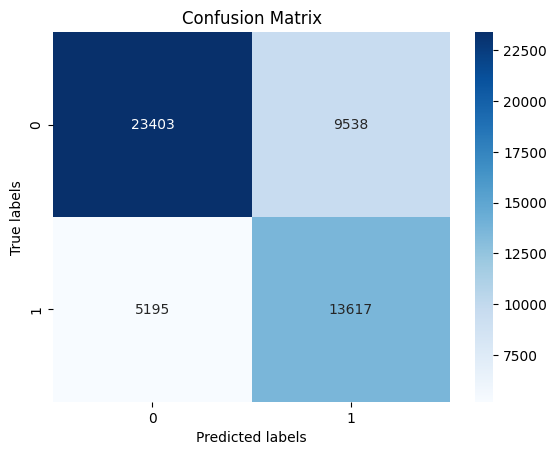

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df_vertical = pd.DataFrame(np.vstack((y_pred)), columns=["Gov"])
df_vertical = df_vertical.Gov.astype(str)
df_vertical.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
newone = X_test.join(df_vertical)

In [ ]:
# Filter the DataFrame using the mask
df_class_1 = newone[newone['Gov']=="1"]


# Find the top 3 most common occurrences for each feature
top_3_values = {}
for feature in df_class_1.columns[:-1]:  # Exclude the 'Class' column
    value_counts = df_class_1[feature].value_counts().head(3)
    total_class_1 = len(df_class_1)
    top_3_values[feature] = [(value, count, count / total_class_1 * 100) for value, count in value_counts.items()]

# Print the results
print("Top 3 most common occurrences per feature when Class is 1 (value, count, percentage):")
for feature, values in top_3_values.items():
    print(f"{feature}:")
    for value, count, percentage in values:
        print(f"  Value: {value:}, Count: {count}, Percentage: {percentage:.2f}%")

Top 3 most common occurrences per feature when Class is 1 (value, count, percentage):
SUBJ_MATTER_OBJET:
  Value: Budget, Count: 1852, Percentage: 8.00%
  Value: Economic Development, Count: 1812, Percentage: 7.83%
  Value: Infrastructure, Count: 1361, Percentage: 5.88%
RGSTRNT_TEL_DCLRNT:
  Value: 613, Count: 10609, Percentage: 45.82%
  Value: 416, Count: 5677, Percentage: 24.52%
  Value: 306, Count: 1181, Percentage: 5.10%
PARENT_IND_SOC_MERE:
  Value: N, Count: 19199, Percentage: 82.92%
  Value: O, Count: 2183, Percentage: 9.43%
  Value: Y, Count: 1773, Percentage: 7.66%
COALITION_IND:
  Value: N, Count: 22864, Percentage: 98.74%
  Value: Y, Count: 291, Percentage: 1.26%
SUBSIDIARY_IND_FILIALE:
  Value: N, Count: 18032, Percentage: 77.88%
  Value: O, Count: 2563, Percentage: 11.07%
  Value: Y, Count: 2560, Percentage: 11.06%
DIRECT_INT_IND_INT_DIRECT:
  Value: N, Count: 22038, Percentage: 95.18%
  Value: Y, Count: 1117, Percentage: 4.82%
INSTITUTION:
  Value: Natural Resources Canad

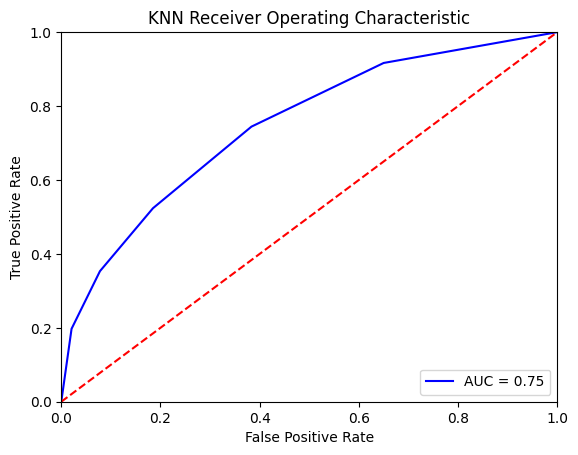

<ipython-input-57-da29be6910c4>:48: RuntimeWarning: invalid value encountered in divide
  plt.plot(ppr, tpr / ppr, label='')


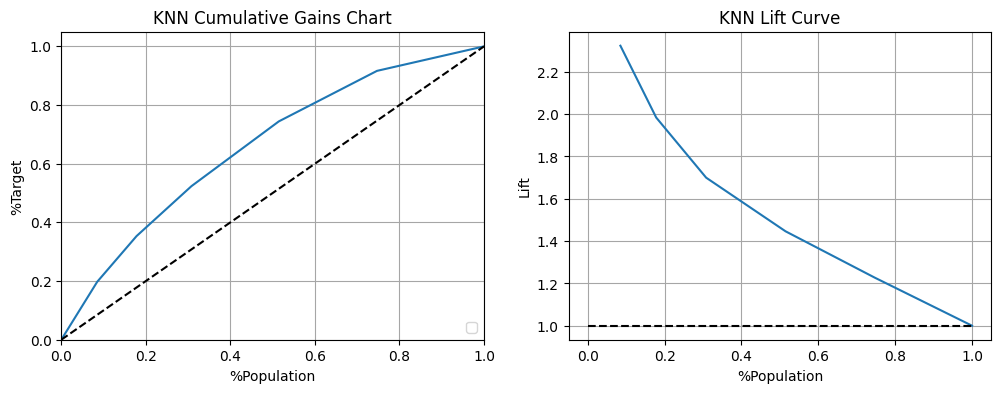

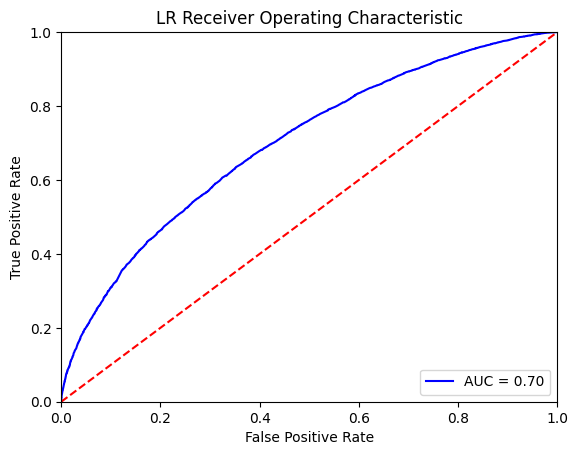

<ipython-input-57-da29be6910c4>:48: RuntimeWarning: invalid value encountered in divide
  plt.plot(ppr, tpr / ppr, label='')


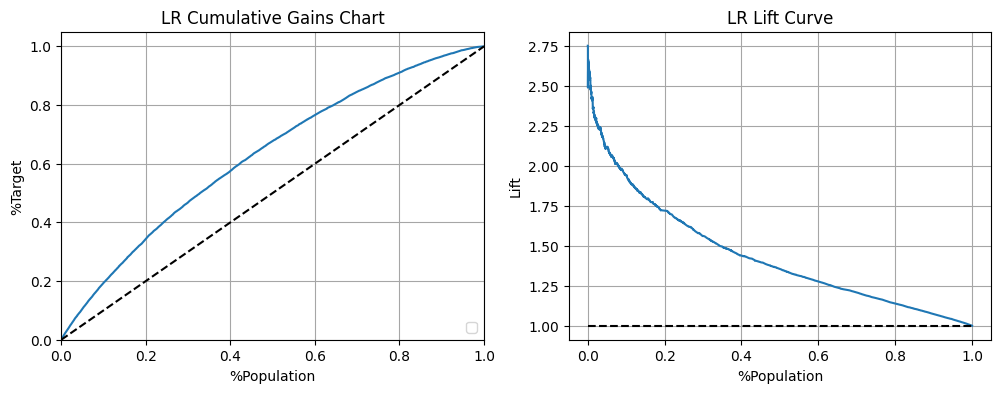

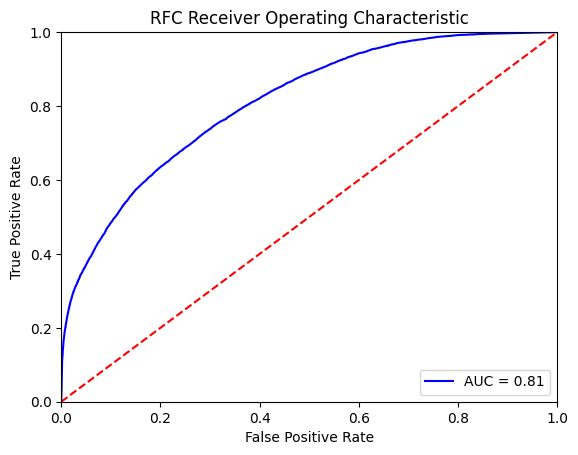

<ipython-input-57-da29be6910c4>:48: RuntimeWarning: invalid value encountered in divide
  plt.plot(ppr, tpr / ppr, label='')


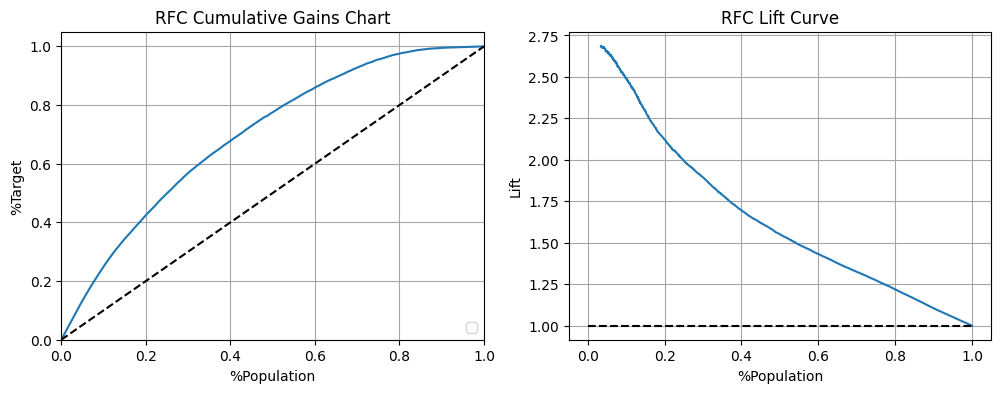

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def roc_plot(actual, probability, model_name):
    """
    Inputs:
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)

    Output: ROC plot with AUC
    """
    fpr, tpr, _ = roc_curve(actual, probability)
    plt.title(model_name + ' Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % auc(fpr, tpr))
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def lift_plot(actual, probability, model_name):
    """
    Inputs:
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)

    Output: Cumulative Gain Chart and Lift Curve
    """
    fpr, tpr, thresholds = roc_curve(actual, probability)
    ppr = (tpr * actual.sum() + fpr * (actual.count() - actual.sum())) / actual.count()
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(ppr, tpr, label='')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(visible=True, which='both', color='0.65', linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('%Target')
    plt.title(model_name + ' Cumulative Gains Chart')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(ppr, tpr / ppr, label='')
    plt.plot([0, 1], [1, 1], 'k--')
    plt.grid(visible=True, which='both', color='0.65', linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('Lift')
    plt.title(model_name + ' Lift Curve')
    plt.show()

# Validate and plot ROC and Lift Curves for each model
for name, model in models.items():
    if hasattr(model.steps[-1][1], 'predict_proba'):
        y_probs = model.predict_proba(X_test)[:, 1]
        roc_plot(y_test, y_probs, name)
        lift_plot(y_test, y_probs, name)